In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/new_ml_project/Red_wine_project/research/WineQT.csv')
df.head(
    
)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [24]:
df.shape

(1143, 13)

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


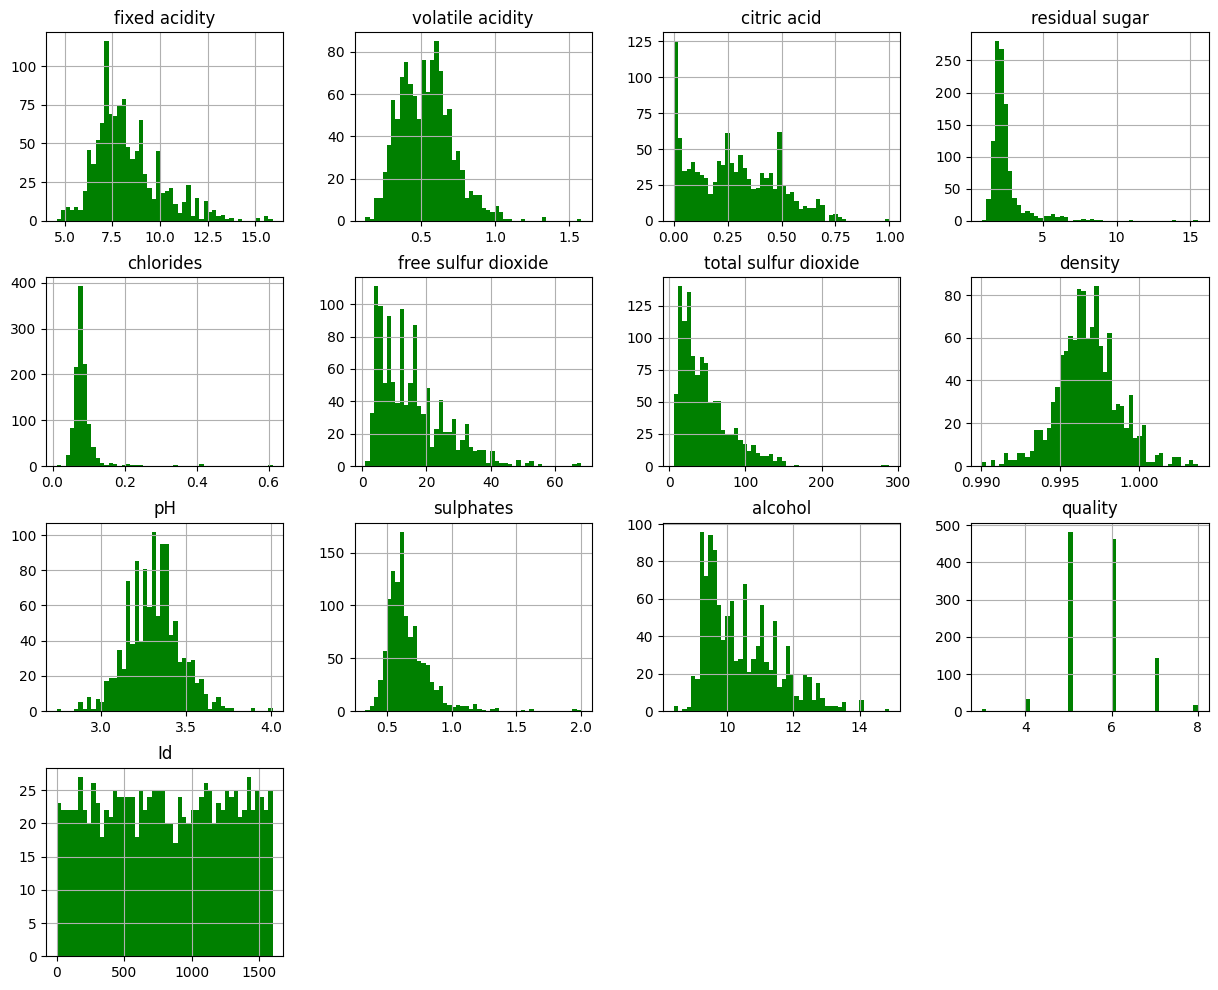

In [28]:
df.hist(bins = 50,figsize=(15,12),color = 'green')
plt.show()

In [29]:
# independent and dependent variable
x = df.drop(columns = 'quality',axis = 1)
y = df['quality']

In [30]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 12)
(229, 12)
(914,)
(229,)


In [31]:
# model training
from sklearn.linear_model import ElasticNet
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(x_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [33]:
predicted_value = lr.predict(x_test)

In [34]:
predicted_value

array([5.41827018, 5.11124249, 5.47220991, 5.27146275, 6.35194597,
       6.49994323, 5.41305884, 5.19195673, 5.70485351, 5.3980524 ,
       6.27045638, 5.92748989, 5.74737186, 6.14964586, 5.85425439,
       5.56051331, 5.5014995 , 5.67549416, 5.42078388, 6.20175259,
       5.74908949, 5.88520389, 5.21947575, 6.15249646, 5.6468529 ,
       5.41428448, 6.3145176 , 5.86278447, 5.35666361, 5.57796355,
       6.39874219, 5.54267933, 6.4496524 , 5.67001657, 5.75237299,
       5.26007007, 5.67783963, 5.80701407, 6.5990968 , 5.14814451,
       5.98899061, 5.67122952, 6.68134479, 5.48775059, 5.42112696,
       5.37167409, 5.91657362, 5.90908389, 5.1220525 , 5.88900446,
       6.21305379, 5.61952411, 5.61123571, 5.699142  , 5.51902632,
       6.23358344, 5.74317845, 5.75628747, 5.51127107, 5.42736815,
       5.51287797, 5.98921461, 5.72192076, 5.9337469 , 6.02348539,
       5.59003484, 6.52929783, 5.21137133, 5.18590923, 5.97240397,
       5.34815543, 5.36882586, 5.31793627, 6.19542595, 5.55907

In [35]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)

In [36]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.629995959330732
mae =  0.5034416470825984
r2 =  0.2867669826959264


In [37]:
# Hyperparmeter tunning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the model
model = ElasticNet()

# Define the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Best model
best_model = grid_search.best_estimator_


Best parameters: {'alpha': 0.01, 'l1_ratio': 0.1}


# using ElasticnetCV

In [38]:
from sklearn.linear_model import ElasticNetCV

# Define and fit the model
model_cv = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9], alphas=[0.01, 0.1, 1, 10, 100], cv=5)
model_cv.fit(x_train, y_train)

# Best parameters
print("Best alpha:", model_cv.alpha_)
print("Best l1_ratio:", model_cv.l1_ratio_)


Best alpha: 0.01
Best l1_ratio: 0.1


In [39]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [40]:
y_pred_with_cv = elastic_net.predict(x_test)
y_pred_with_cv

array([5.33122509, 4.80680307, 5.38068902, 5.4925468 , 6.23003129,
       6.57424904, 5.3113021 , 5.18958971, 5.77459931, 5.41461686,
       6.36420807, 6.25050804, 5.43448284, 6.20591809, 5.83209493,
       5.0213874 , 5.68163895, 5.66469381, 5.36886929, 6.47240125,
       5.93851883, 5.98477677, 5.19962157, 6.42212171, 5.65006311,
       5.19817677, 6.53574907, 6.00142415, 5.09695919, 5.51984203,
       6.23705443, 5.51108024, 6.56398174, 5.7325593 , 5.69785097,
       5.21177551, 5.58627141, 5.94977138, 6.8707157 , 5.96175144,
       6.29858816, 5.42632514, 7.00867647, 5.27336948, 5.10127917,
       5.12837644, 5.73045344, 5.8980556 , 4.73347691, 5.77608428,
       6.42589132, 5.28691204, 5.62439753, 5.82217548, 5.69898098,
       6.41175088, 5.6129962 , 5.74383746, 5.79467975, 5.31616673,
       5.53954767, 5.96831794, 5.81142677, 6.17182366, 6.17904038,
       5.49187159, 6.79694087, 5.18504593, 4.97481317, 5.98616995,
       5.56005205, 5.27475177, 5.67809881, 6.07746825, 5.18850

In [41]:
(rmse, mae, r2) = eval_metrics(y_test, y_pred_with_cv)

In [42]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.6036144583647262
mae =  0.4667059638276316
r2 =  0.34525049418244247
